# Suicide analysis by Gender and Age range 5-14


## Import data and preprocessing



In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE
df5 = df[df["age"] == lst[0]]
df5 = df5.reset_index(drop=True)

In [ ]:
male_df = df5[df5["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df5[df5["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0            0          0
1     Argentina  1986  male  ...           0            0          0
2     Argentina  1987  male  ...           0            0          0
3     Argentina  1988  male  ...           0            0          0
4     Argentina  1989  male  ...           0            0          0
...         ...   ...   ...  ...         ...          ...        ...
1638    Uruguay  2010  male  ...           0            0          0
1639    Uruguay  2012  male  ...           0            0          0
1640    Uruguay  2013  male  ...           0            0          0
1641    Uruguay  2014  male  ...           0            0          0
1642    Uruguay  2015  male  ...           0            0          0

[1643 rows x 34 columns]

In [ ]:
##This part is only if you want to save this portion of data.
# male_df.to_csv(path_or_buf = "male_5-14.csv",index = False)

In [ ]:
print(len(male_df))
print(len(female_df))

1643
1643


In [ ]:
male_df.isnull().sum()

country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)


In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0            0          0
1     Argentina  1986  female  ...           0            0          0
2     Argentina  1987  female  ...           0            0          0
3     Argentina  1988  female  ...           0            0          0
4     Argentina  1989  female  ...           0            0          0
...         ...   ...     ...  ...         ...          ...        ...
1638    Uruguay  2010  female  ...           0            0          0
1639    Uruguay  2012  female  ...           0            0          0
1640    Uruguay  2013  female  ...           0            0          0
1641    Uruguay  2014  female  ...           0            0          0
1642    Uruguay  2015  female  ...           0            0          0

[1643 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)

In [ ]:
male_df

country   sex         age  ...  35-54 years  55-74 years  75+ years
year                                    ...                                     
1985       Argentina  male  5-14 years  ...            0            0          0
1985       Australia  male  5-14 years  ...            0            0          0
1985         Austria  male  5-14 years  ...            0            0          0
1985        Barbados  male  5-14 years  ...            0            0          0
1985         Belgium  male  5-14 years  ...            0            0          0
...              ...   ...         ...  ...          ...          ...        ...
2015        Thailand  male  5-14 years  ...            0            0          0
2015         Ukraine  male  5-14 years  ...            0            0          0
2015  United Kingdom  male  5-14 years  ...            0            0          0
2015   United States  male  5-14 years  ...            0            0          0
2015         Uruguay  male  5-14 years  ...            0            0          0

[1643 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]


country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()




In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 5-14 year Argentina 's suicides_no


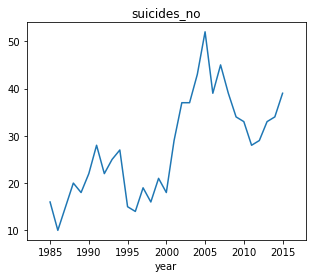

Men range 5-14 year Australia 's suicides_no


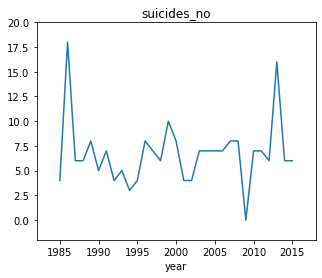

Men range 5-14 year Austria 's suicides_no


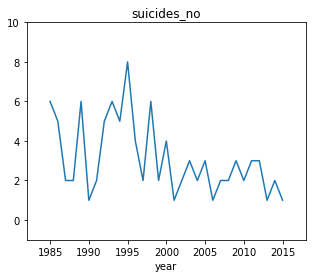

Men range 5-14 year Barbados 's suicides_no


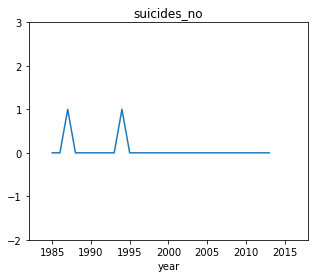

Men range 5-14 year Belgium 's suicides_no


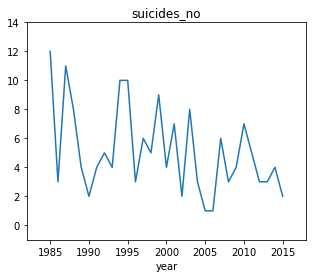

Men range 5-14 year Brazil 's suicides_no


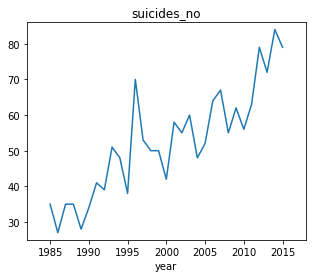

Men range 5-14 year Bulgaria 's suicides_no


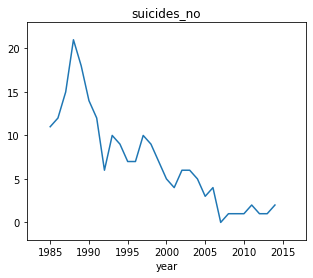

Men range 5-14 year Canada 's suicides_no


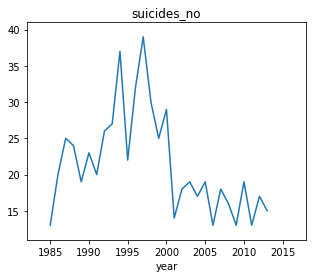

Men range 5-14 year Chile 's suicides_no


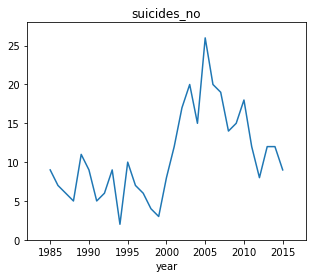

Men range 5-14 year Colombia 's suicides_no


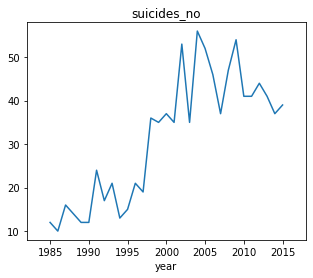

Men range 5-14 year Costa Rica 's suicides_no


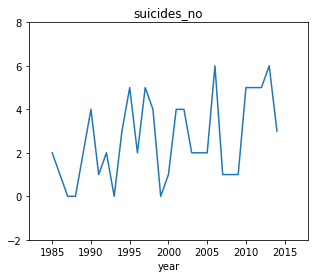

Men range 5-14 year Ecuador 's suicides_no


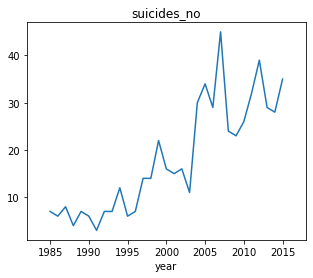

Men range 5-14 year France 's suicides_no


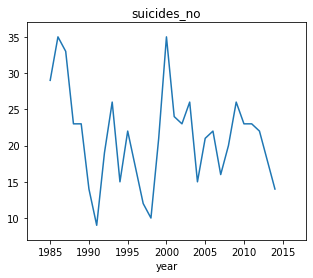

Men range 5-14 year Greece 's suicides_no


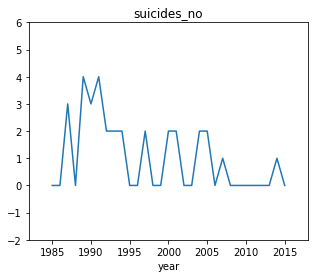

Men range 5-14 year Grenada 's suicides_no


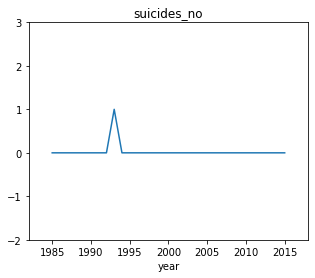

Men range 5-14 year Iceland 's suicides_no


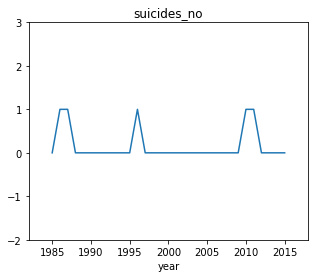

Men range 5-14 year Ireland 's suicides_no


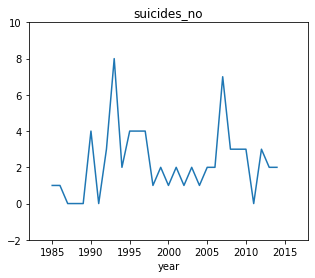

Men range 5-14 year Israel 's suicides_no


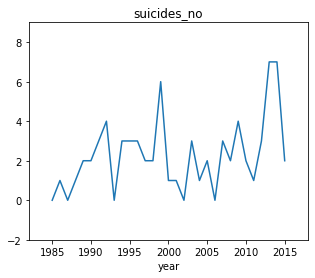

Men range 5-14 year Italy 's suicides_no


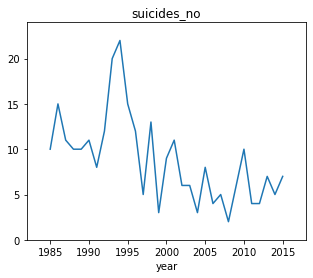

Men range 5-14 year Japan 's suicides_no


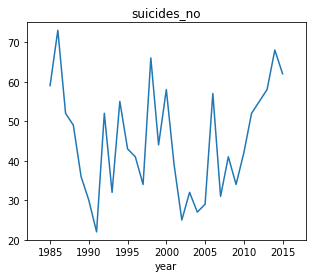

Men range 5-14 year Kuwait 's suicides_no


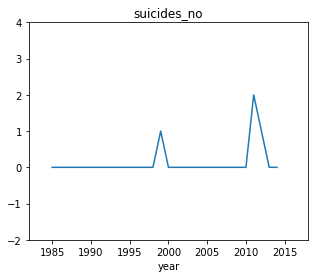

Men range 5-14 year Luxembourg 's suicides_no


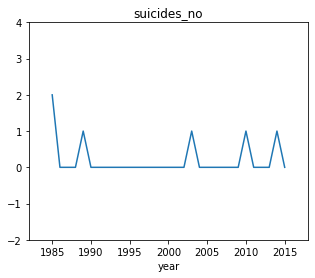

Men range 5-14 year Malta 's suicides_no


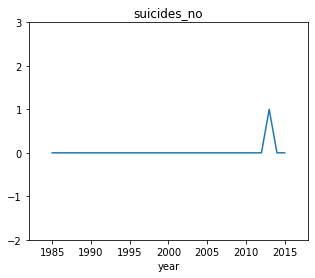

Men range 5-14 year Mauritius 's suicides_no


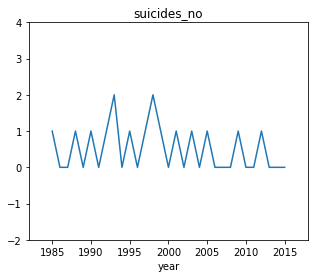

Men range 5-14 year Mexico 's suicides_no


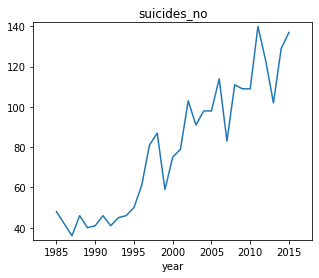

Men range 5-14 year Netherlands 's suicides_no


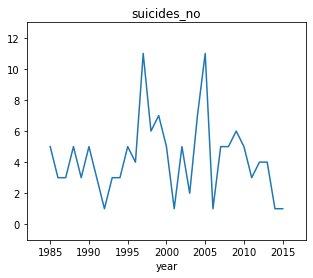

Men range 5-14 year New Zealand 's suicides_no


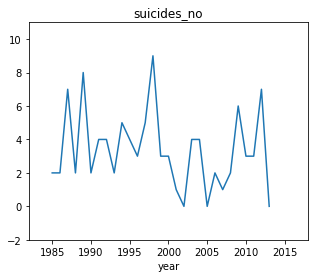

Men range 5-14 year Panama 's suicides_no


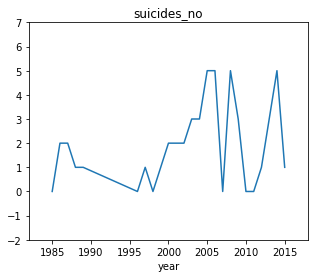

Men range 5-14 year Paraguay 's suicides_no


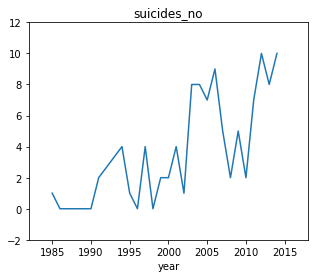

Men range 5-14 year Portugal 's suicides_no


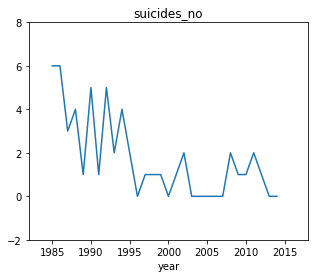

Men range 5-14 year Puerto Rico 's suicides_no


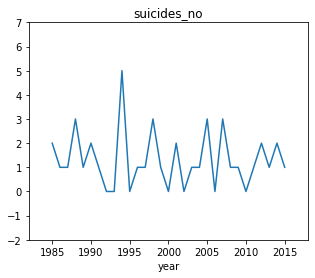

Men range 5-14 year Republic of Korea 's suicides_no


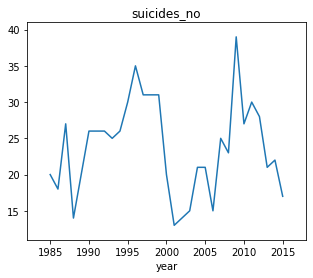

Men range 5-14 year Saint Vincent and Grenadines 's suicides_no


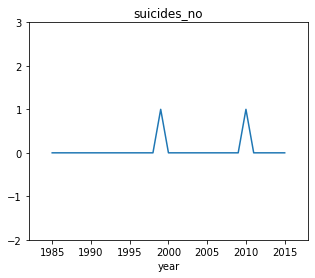

Men range 5-14 year Singapore 's suicides_no


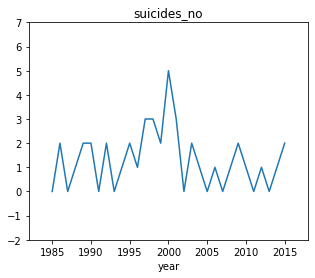

Men range 5-14 year Spain 's suicides_no


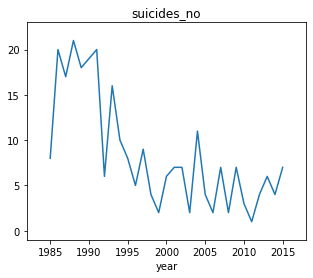

Men range 5-14 year Suriname 's suicides_no


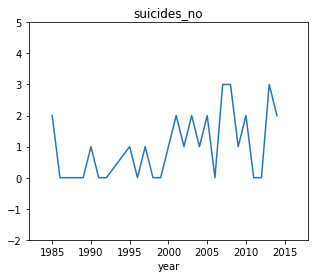

Men range 5-14 year Thailand 's suicides_no


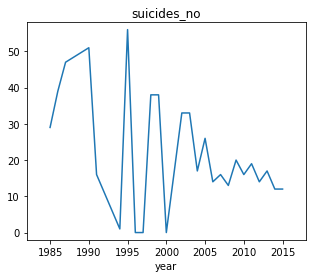

Men range 5-14 year Trinidad and Tobago 's suicides_no


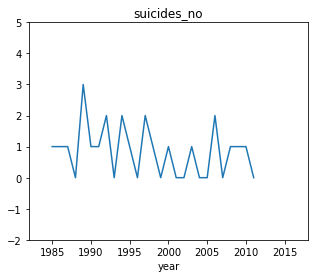

Men range 5-14 year United Kingdom 's suicides_no


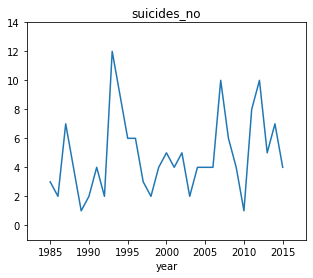

Men range 5-14 year United States 's suicides_no


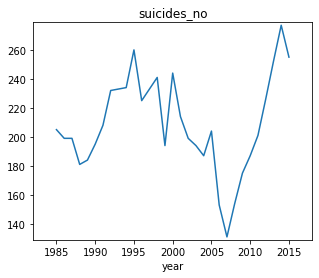

Men range 5-14 year Uruguay 's suicides_no


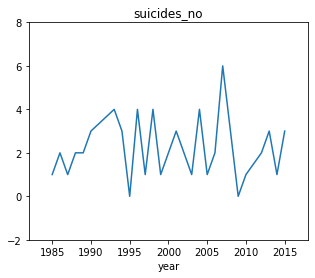

Men range 5-14 year Belize 's suicides_no


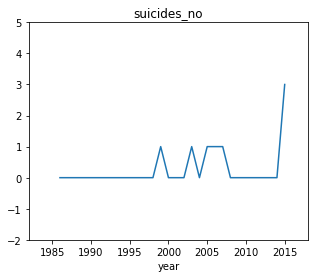

Men range 5-14 year Guatemala 's suicides_no


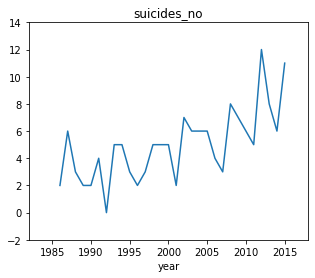

Men range 5-14 year Norway 's suicides_no


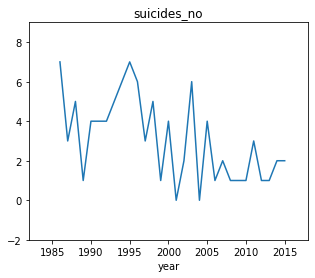

Men range 5-14 year Saint Lucia 's suicides_no


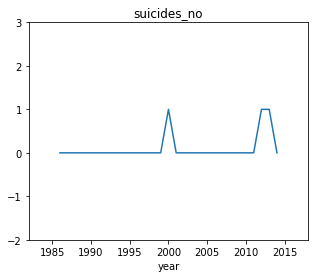

Men range 5-14 year Finland 's suicides_no


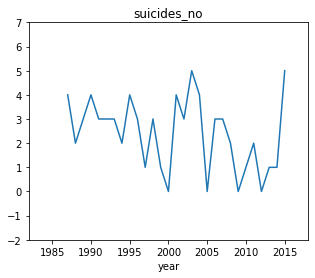

Men range 5-14 year Sweden 's suicides_no


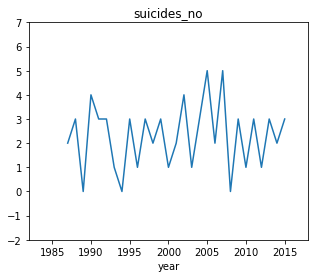

Men range 5-14 year Guyana 's suicides_no


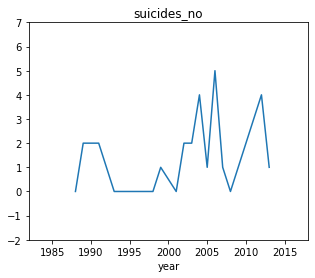

Men range 5-14 year Ukraine 's suicides_no


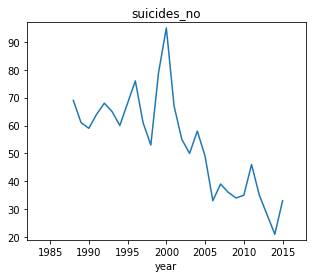

Men range 5-14 year Romania 's suicides_no


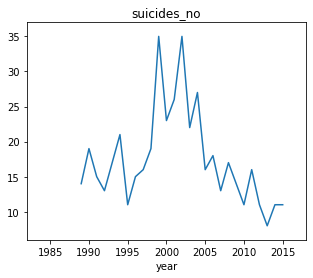

Men range 5-14 year Russian Federation 's suicides_no


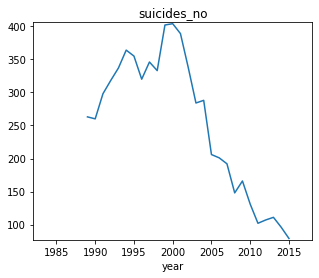

Men range 5-14 year Armenia 's suicides_no


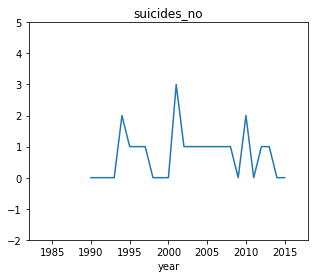

Men range 5-14 year Czech Republic 's suicides_no


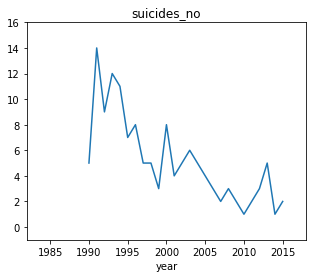

Men range 5-14 year Germany 's suicides_no


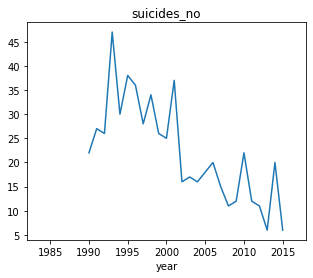

Men range 5-14 year Kazakhstan 's suicides_no


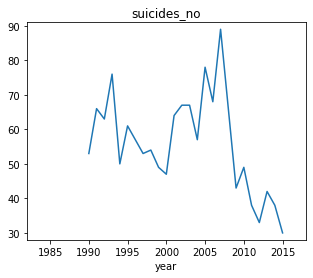

Men range 5-14 year Kyrgyzstan 's suicides_no


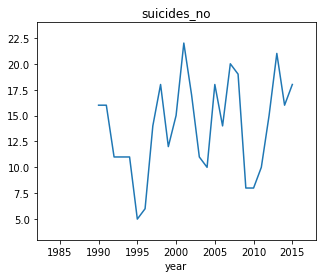

Men range 5-14 year Hungary 's suicides_no


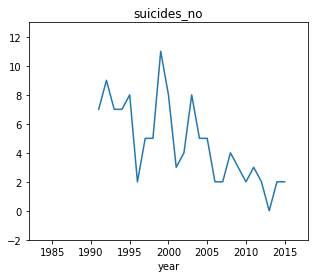

In [ ]:
# For male
for s in country:
    for t in targets:
      print("Men range 5-14 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()

Women  Argentina 's suicides_no


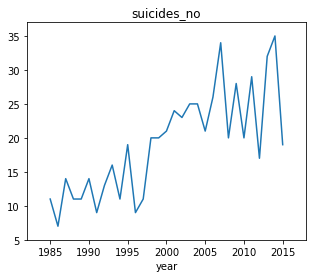

Women  Australia 's suicides_no


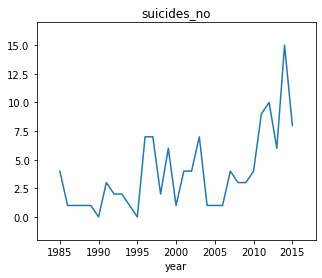

Women  Austria 's suicides_no


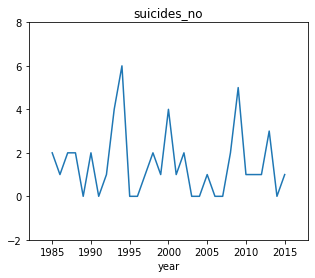

Women  Barbados 's suicides_no


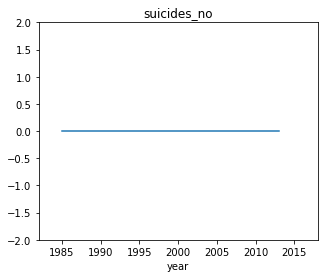

Women  Belgium 's suicides_no


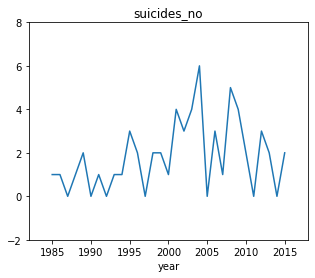

Women  Brazil 's suicides_no


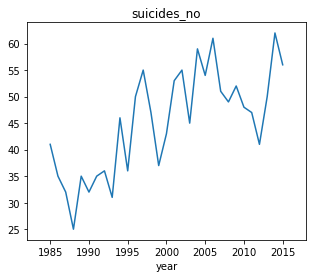

Women  Bulgaria 's suicides_no


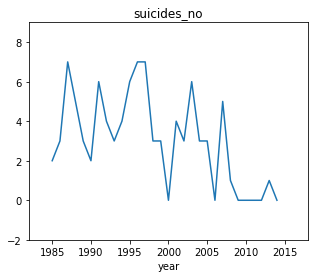

Women  Canada 's suicides_no


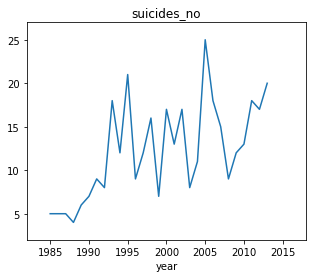

Women  Chile 's suicides_no


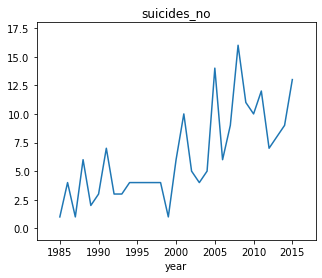

Women  Colombia 's suicides_no


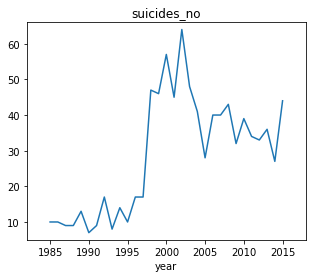

Women  Costa Rica 's suicides_no


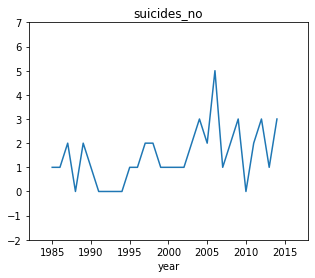

Women  Ecuador 's suicides_no


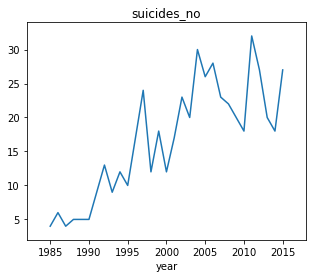

Women  France 's suicides_no


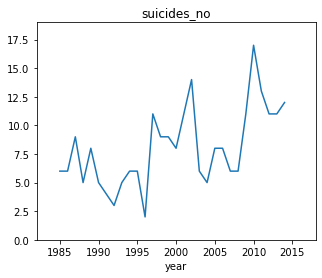

Women  Greece 's suicides_no


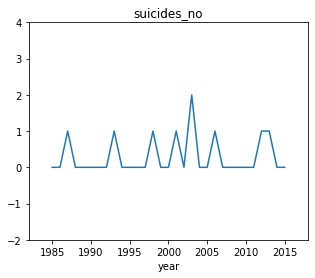

Women  Grenada 's suicides_no


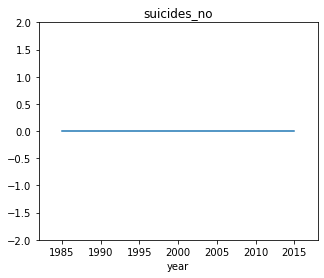

Women  Iceland 's suicides_no


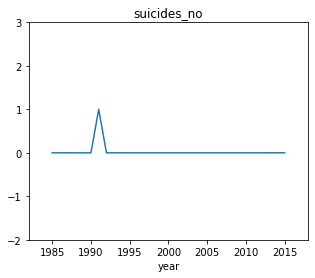

Women  Ireland 's suicides_no


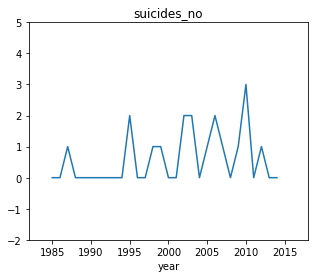

Women  Israel 's suicides_no


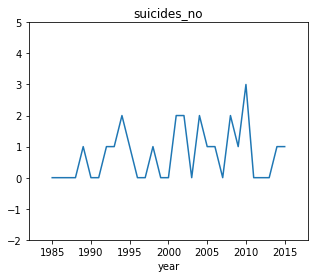

Women  Italy 's suicides_no


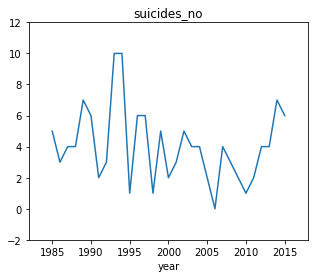

Women  Japan 's suicides_no


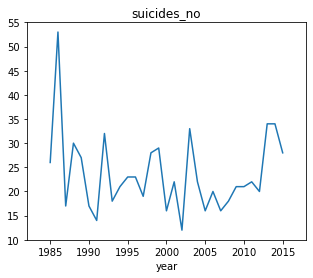

Women  Kuwait 's suicides_no


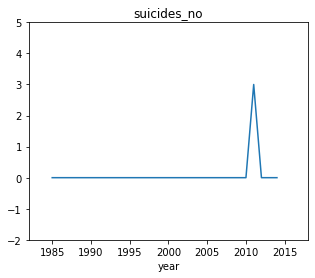

Women  Luxembourg 's suicides_no


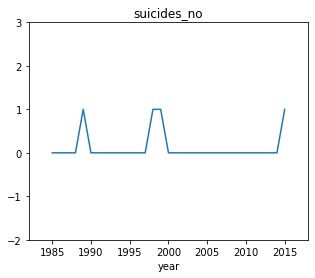

Women  Malta 's suicides_no


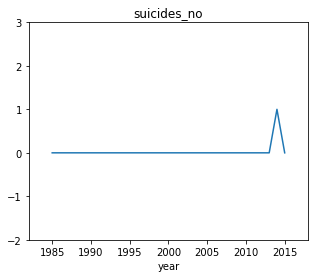

Women  Mauritius 's suicides_no


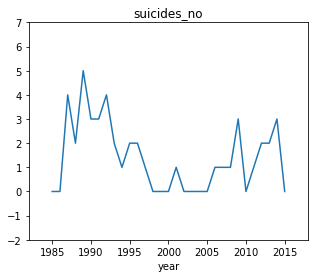

Women  Mexico 's suicides_no


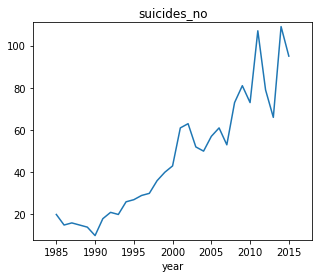

Women  Netherlands 's suicides_no


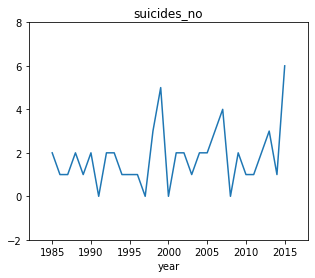

Women  New Zealand 's suicides_no


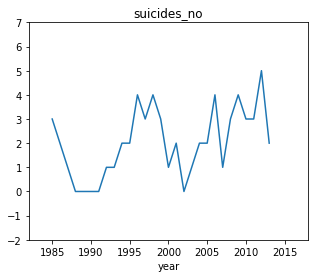

Women  Panama 's suicides_no


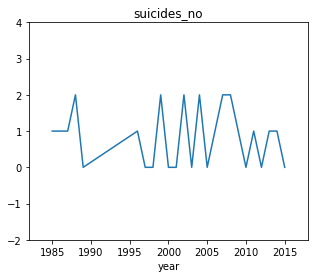

Women  Paraguay 's suicides_no


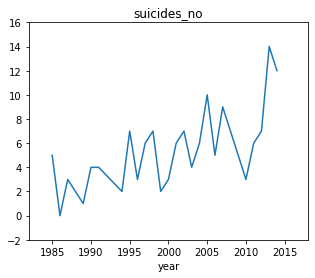

Women  Portugal 's suicides_no


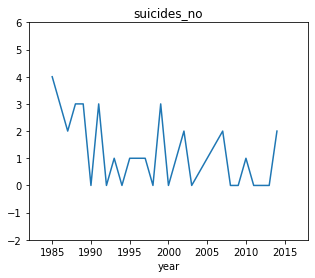

Women  Puerto Rico 's suicides_no


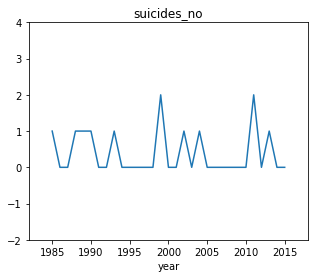

Women  Republic of Korea 's suicides_no


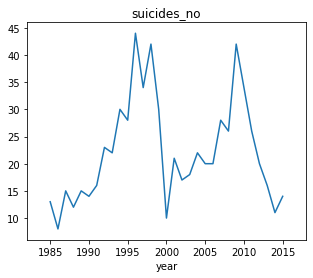

Women  Saint Vincent and Grenadines 's suicides_no


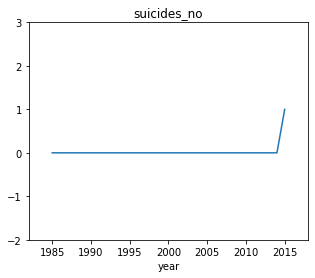

Women  Singapore 's suicides_no


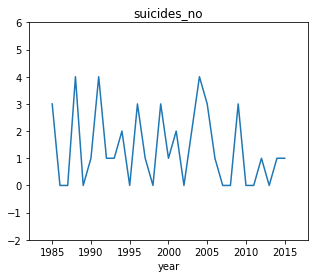

Women  Spain 's suicides_no


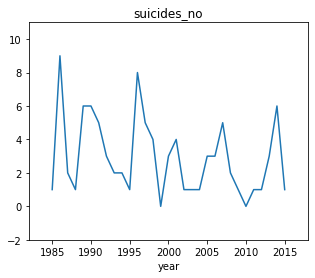

Women  Suriname 's suicides_no


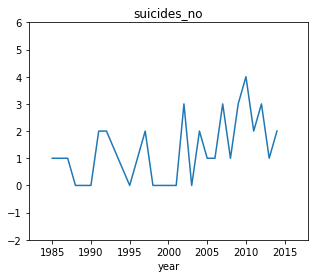

Women  Thailand 's suicides_no


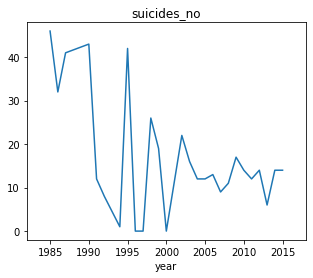

Women  Trinidad and Tobago 's suicides_no


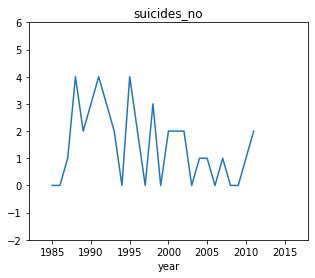

Women  United Kingdom 's suicides_no


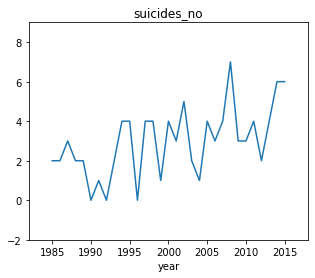

Women  United States 's suicides_no


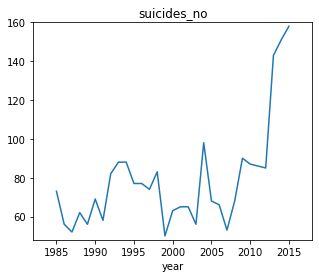

Women  Uruguay 's suicides_no


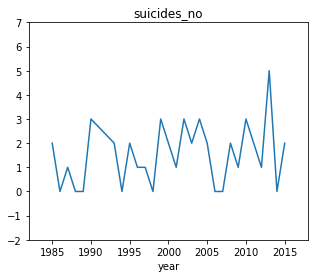

Women  Belize 's suicides_no


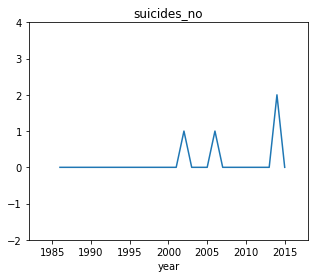

Women  Guatemala 's suicides_no


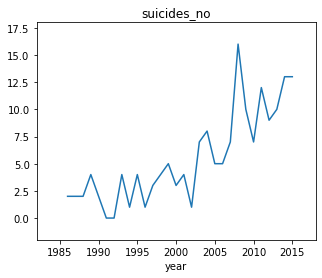

Women  Norway 's suicides_no


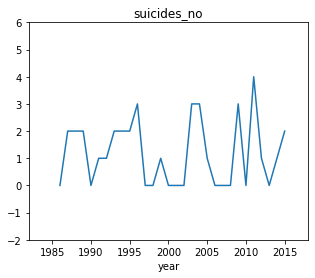

Women  Saint Lucia 's suicides_no


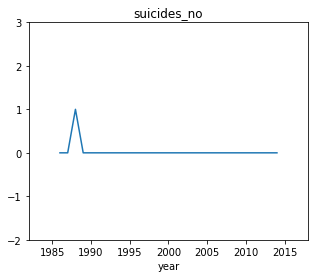

Women  Finland 's suicides_no


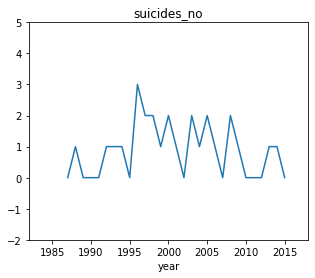

Women  Sweden 's suicides_no


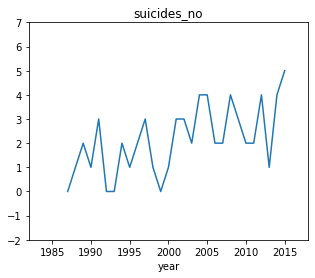

Women  Guyana 's suicides_no


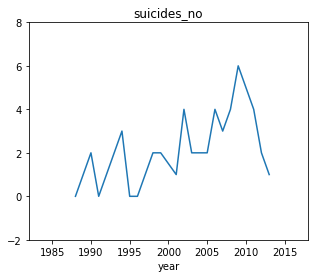

Women  Ukraine 's suicides_no


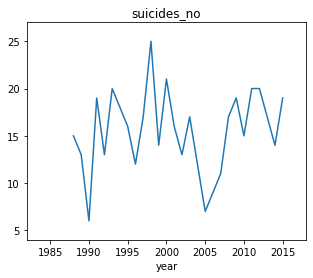

Women  Romania 's suicides_no


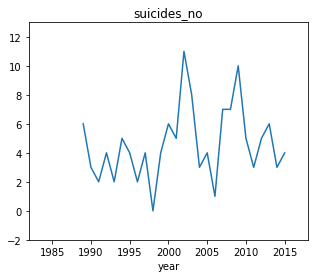

Women  Russian Federation 's suicides_no


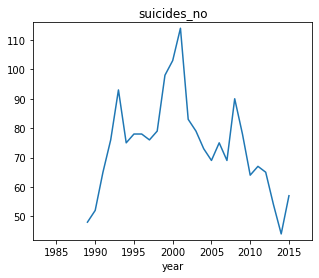

Women  Armenia 's suicides_no


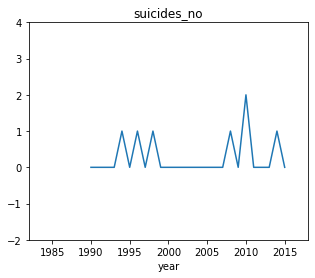

Women  Czech Republic 's suicides_no


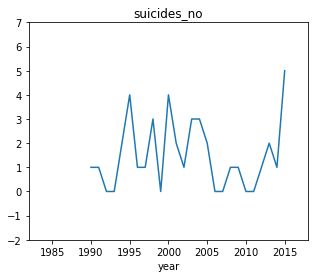

Women  Germany 's suicides_no


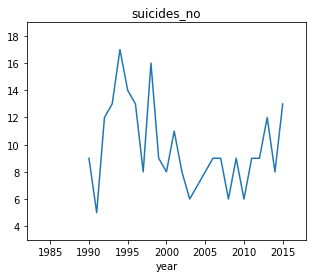

Women  Kazakhstan 's suicides_no


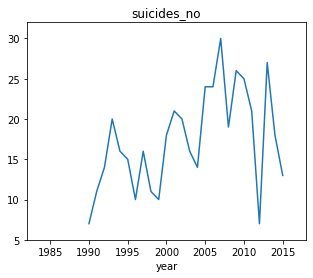

Women  Kyrgyzstan 's suicides_no


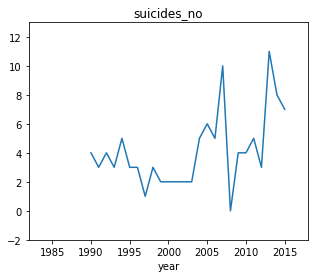

Women  Hungary 's suicides_no


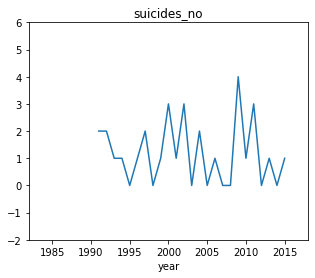

In [ ]:
# For female
for s in fecountry:
    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()

### 1 B. Plot the suicide time series for all countries.





In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)
pivot_test_fem

suicides_no                    ...                                     
country   Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                   ...                                     
1985           11.0     NaN       4.0  ...            2.0          73.0     2.0
1986            7.0     NaN       1.0  ...            2.0          56.0     0.0
1987           14.0     NaN       1.0  ...            3.0          52.0     1.0
1988           11.0     NaN       1.0  ...            2.0          62.0     0.0
1989           11.0     NaN       1.0  ...            2.0          56.0     0.0
1990           14.0     0.0       0.0  ...            0.0          69.0     3.0
1991            9.0     0.0       3.0  ...            1.0          58.0     NaN
1992           13.0     0.0       2.0  ...            0.0          82.0     NaN
1993           16.0     0.0       2.0  ...            2.0          88.0     2.0
1994           11.0     1.0       1.0  ...            4.0          88.0     0.0
1995           19.0     0.0       0.0  ...            4.0          77.0     2.0
1996            9.0     1.0       7.0  ...            0.0          77.0     1.0
1997           11.0     0.0       7.0  ...            4.0          74.0     1.0
1998           20.0     1.0       2.0  ...            4.0          83.0     0.0
1999           20.0     0.0       6.0  ...            1.0          50.0     3.0
2000           21.0     0.0       1.0  ...            4.0          63.0     2.0
2001           24.0     0.0       4.0  ...            3.0          65.0     1.0
2002           23.0     0.0       4.0  ...            5.0          65.0     3.0
2003           25.0     0.0       7.0  ...            2.0          56.0     2.0
2004           25.0     NaN       1.0  ...            1.0          98.0     3.0
2005           21.0     NaN       NaN  ...            4.0          68.0     2.0
2006           26.0     0.0       1.0  ...            3.0          66.0     0.0
2007           34.0     0.0       4.0  ...            4.0          53.0     0.0
2008           20.0     1.0       3.0  ...            7.0          68.0     2.0
2009           28.0     0.0       3.0  ...            3.0          90.0     1.0
2010           20.0     2.0       4.0  ...            3.0          87.0     3.0
2011           29.0     0.0       9.0  ...            4.0          86.0     NaN
2012           17.0     0.0      10.0  ...            2.0          85.0     1.0
2013           32.0     0.0       6.0  ...            4.0         143.0     5.0
2014           35.0     1.0      15.0  ...            6.0         151.0     0.0
2015           19.0     0.0       8.0  ...            6.0         158.0     2.0

[31 rows x 57 columns]

In [ ]:
## This is for data interpolation
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina  Armenia  Australia  ...  United Kingdom  United States   Uruguay
year                                    ...                                         
1985          16.0      0.0        4.0  ...             3.0          205.0  1.000000
1986          10.0      0.0       18.0  ...             2.0          199.0  2.000000
1987          15.0      0.0        6.0  ...             7.0          199.0  1.000000
1988          20.0      0.0        6.0  ...             4.0          181.0  2.000000
1989          18.0      0.0        8.0  ...             1.0          184.0  2.000000
1990          22.0      0.0        5.0  ...             2.0          195.0  3.000000
1991          28.0      0.0        7.0  ...             4.0          208.0  3.333333
1992          22.0      0.0        4.0  ...             2.0          232.0  3.666667
1993          25.0      0.0        5.0  ...            12.0          233.0  4.000000
1994          27.0      2.0        3.0  ...             9.0          234.0  3.000000
1995          15.0      1.0        4.0  ...             6.0          260.0  0.000000
1996          14.0      1.0        8.0  ...             6.0          225.0  4.000000
1997          19.0      1.0        7.0  ...             3.0          233.0  1.000000
1998          16.0      0.0        6.0  ...             2.0          241.0  4.000000
1999          21.0      0.0       10.0  ...             4.0          194.0  1.000000
2000          18.0      0.0        8.0  ...             5.0          244.0  2.000000
2001          29.0      3.0        4.0  ...             4.0          214.0  3.000000
2002          37.0      1.0        4.0  ...             5.0          199.0  2.000000
2003          37.0      1.0        7.0  ...             2.0          194.0  1.000000
2004          43.0      1.0        7.0  ...             4.0          187.0  4.000000
2005          52.0      1.0        7.0  ...             4.0          204.0  1.000000
2006          39.0      1.0        7.0  ...             4.0          153.0  2.000000
2007          45.0      1.0        8.0  ...            10.0          131.0  6.000000
2008          39.0      1.0        8.0  ...             6.0          154.0  3.000000
2009          34.0      0.0        0.0  ...             4.0          175.0  0.000000
2010          33.0      2.0        7.0  ...             1.0          187.0  1.000000
2011          28.0      0.0        7.0  ...             8.0          201.0  1.500000
2012          29.0      1.0        6.0  ...            10.0          226.0  2.000000
2013          33.0      1.0       16.0  ...             5.0          252.0  3.000000
2014          34.0      0.0        6.0  ...             7.0          277.0  1.000000
2015          39.0      0.0        6.0  ...             4.0          255.0  3.000000

[31 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina  Armenia  Australia  ...  United Kingdom  United States   Uruguay
year                                    ...                                         
1985          11.0      0.0        4.0  ...             2.0           73.0  2.000000
1986           7.0      0.0        1.0  ...             2.0           56.0  0.000000
1987          14.0      0.0        1.0  ...             3.0           52.0  1.000000
1988          11.0      0.0        1.0  ...             2.0           62.0  0.000000
1989          11.0      0.0        1.0  ...             2.0           56.0  0.000000
1990          14.0      0.0        0.0  ...             0.0           69.0  3.000000
1991           9.0      0.0        3.0  ...             1.0           58.0  2.666667
1992          13.0      0.0        2.0  ...             0.0           82.0  2.333333
1993          16.0      0.0        2.0  ...             2.0           88.0  2.000000
1994          11.0      1.0        1.0  ...             4.0           88.0  0.000000
1995          19.0      0.0        0.0  ...             4.0           77.0  2.000000
1996           9.0      1.0        7.0  ...             0.0           77.0  1.000000
1997          11.0      0.0        7.0  ...             4.0           74.0  1.000000
1998          20.0      1.0        2.0  ...             4.0           83.0  0.000000
1999          20.0      0.0        6.0  ...             1.0           50.0  3.000000
2000          21.0      0.0        1.0  ...             4.0           63.0  2.000000
2001          24.0      0.0        4.0  ...             3.0           65.0  1.000000
2002          23.0      0.0        4.0  ...             5.0           65.0  3.000000
2003          25.0      0.0        7.0  ...             2.0           56.0  2.000000
2004          25.0      0.0        1.0  ...             1.0           98.0  3.000000
2005          21.0      0.0        1.0  ...             4.0           68.0  2.000000
2006          26.0      0.0        1.0  ...             3.0           66.0  0.000000
2007          34.0      0.0        4.0  ...             4.0           53.0  0.000000
2008          20.0      1.0        3.0  ...             7.0           68.0  2.000000
2009          28.0      0.0        3.0  ...             3.0           90.0  1.000000
2010          20.0      2.0        4.0  ...             3.0           87.0  3.000000
2011          29.0      0.0        9.0  ...             4.0           86.0  2.000000
2012          17.0      0.0       10.0  ...             2.0           85.0  1.000000
2013          32.0      0.0        6.0  ...             4.0          143.0  5.000000
2014          35.0      1.0       15.0  ...             6.0          151.0  0.000000
2015          19.0      0.0        8.0  ...             6.0          158.0  2.000000

[31 rows x 57 columns]

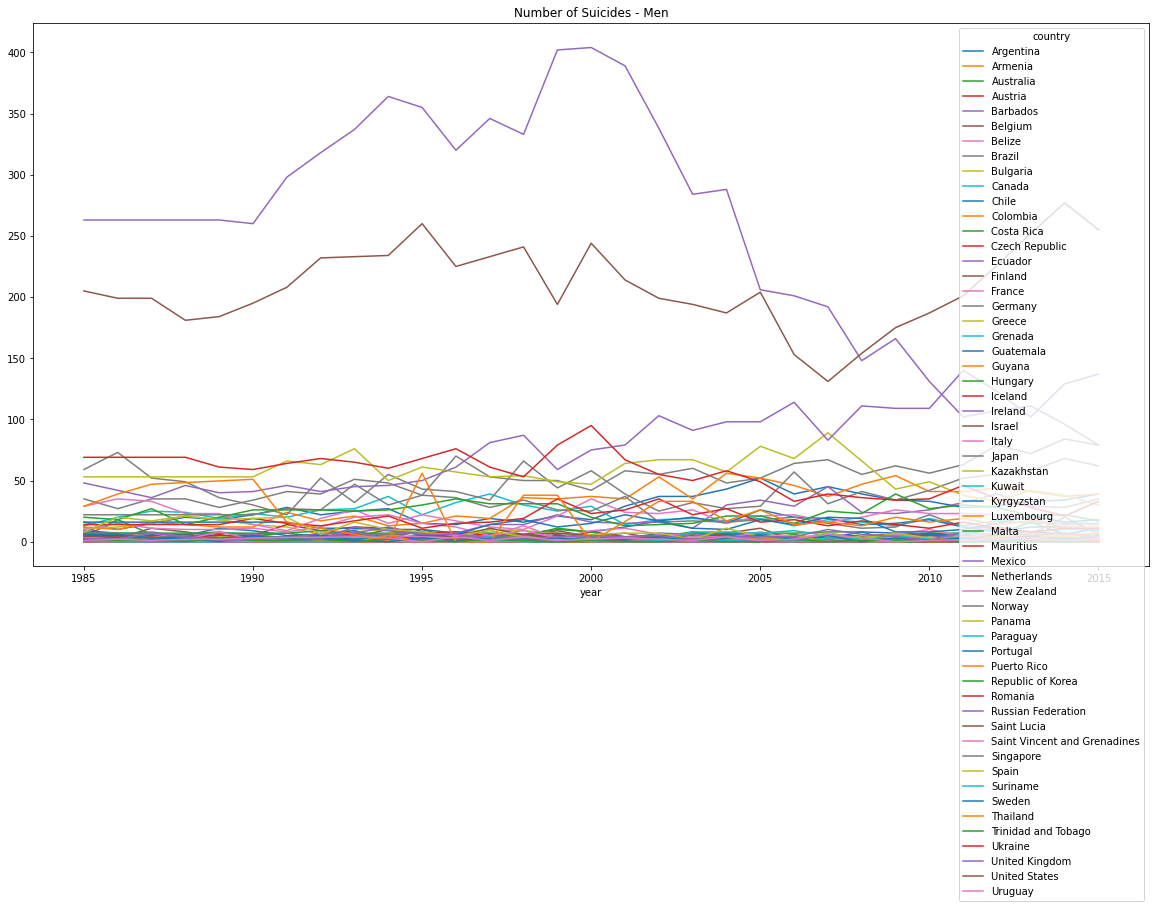

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

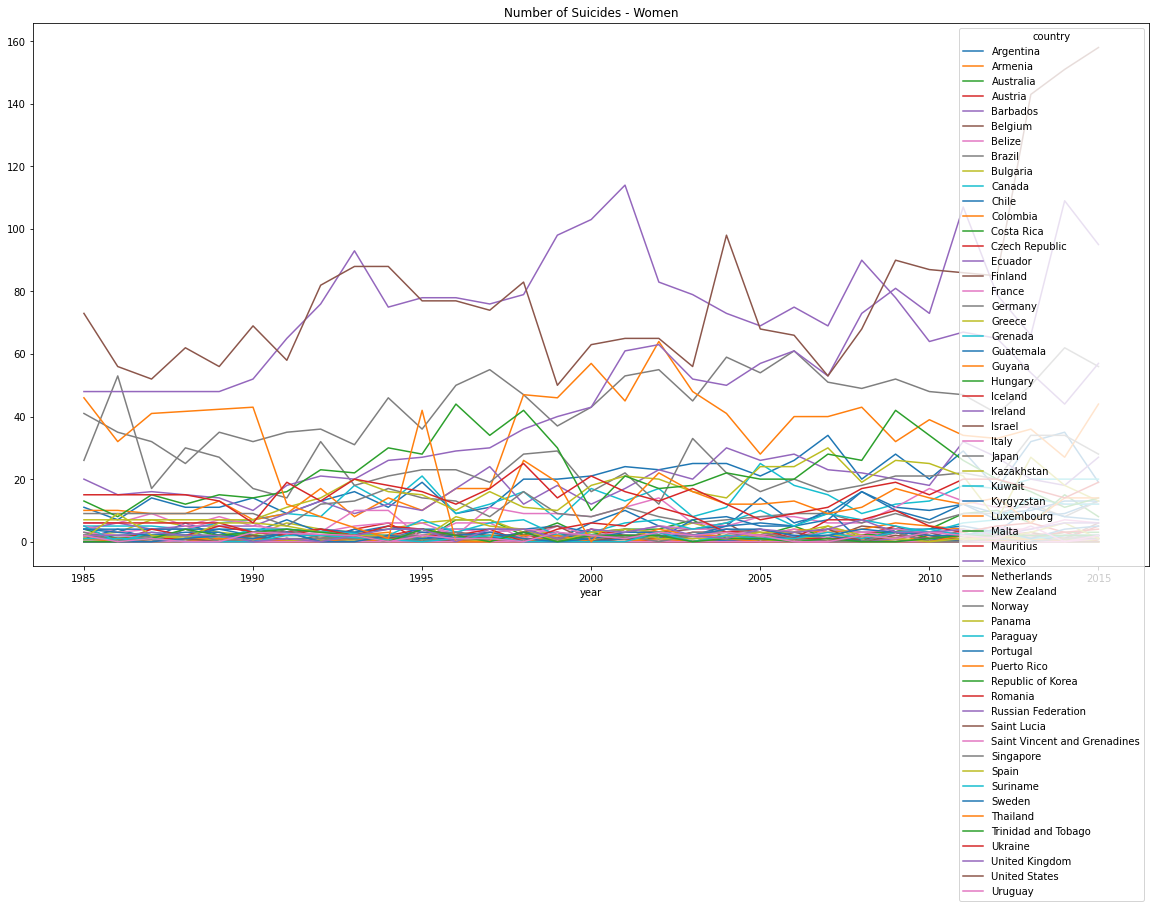

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance




In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 7  6  6  6  6  6  6  4  6  8  9  7  6  6  9  6  9  8  6  6  6  6  6  6
  6  6  6  4  3  6  9  6  6  6  5  6  6  6  6  6  6  6  8  9  1  6  6  6
  6  6  6 10  6  3  6  2  6]
Cluster 7 number of entries 2


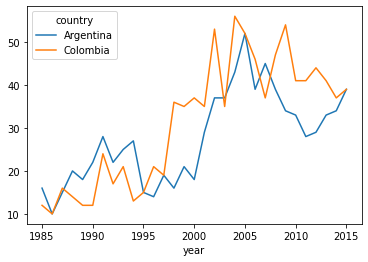

Cluster 6 number of entries 39


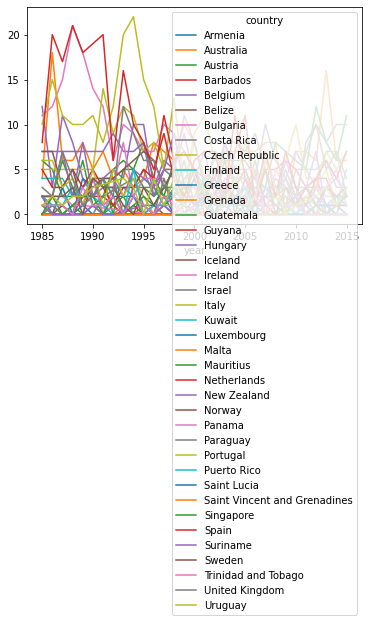

Cluster 4 number of entries 2


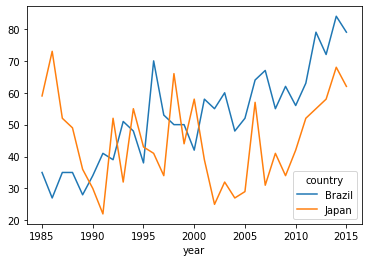

Cluster 8 number of entries 3


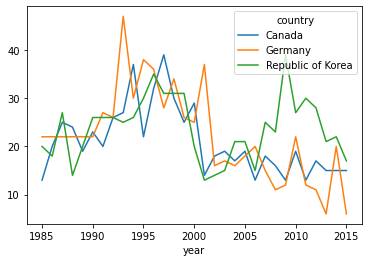

Cluster 9 number of entries 5


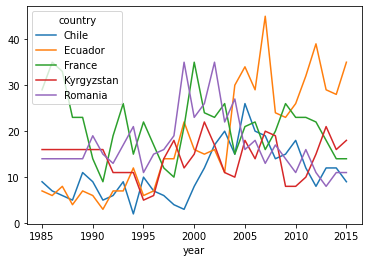

Cluster 3 number of entries 2


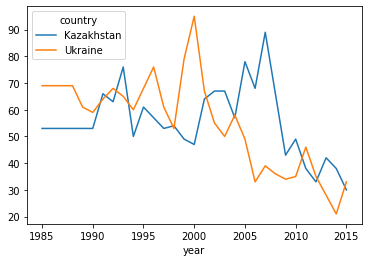

Cluster 5 number of entries 1


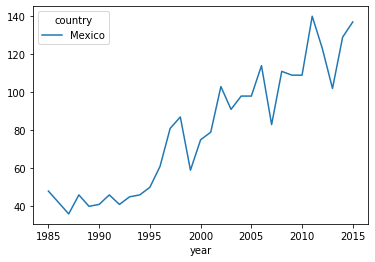

Cluster 1 number of entries 1


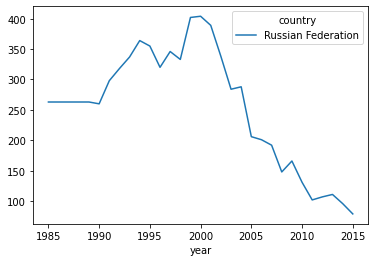

Cluster 10 number of entries 1


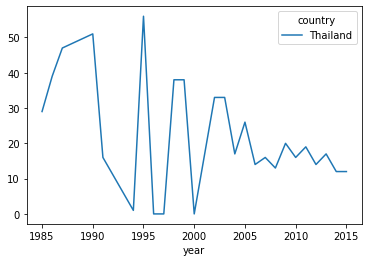

Cluster 2 number of entries 1


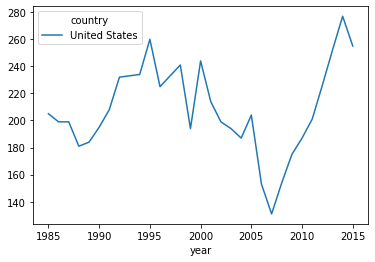

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 7  6  6  6  6  6  6  1  6  8  6  2  6  6  7  6  8  8  6  6  6  6  6  6
  6  6  6  9  7  6  6  6  6  6  3  6  6  6  6  6  6  6  9  6  4  6  6  6
  6  6  6 10  6  8  6  5  6]
Cluster 7 number of entries 3


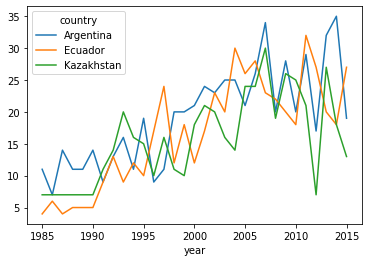

Cluster 6 number of entries 42


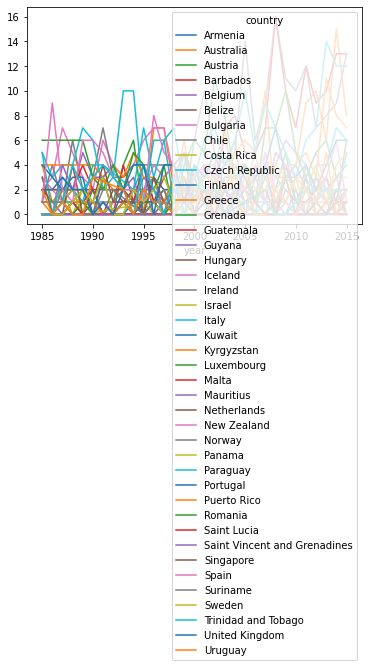

Cluster 1 number of entries 1


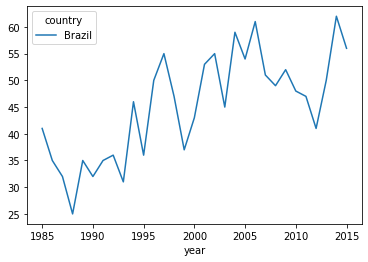

Cluster 8 number of entries 4


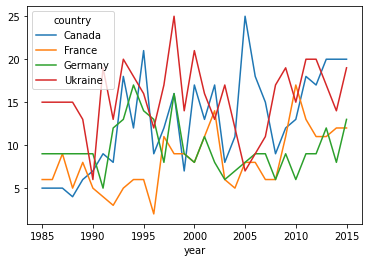

Cluster 2 number of entries 1


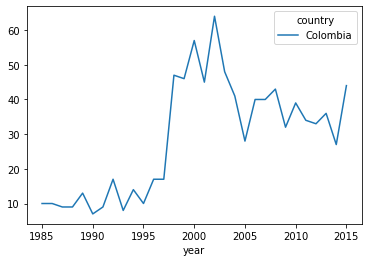

Cluster 9 number of entries 2


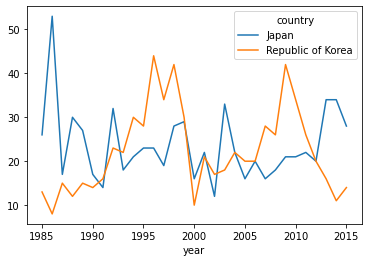

Cluster 3 number of entries 1


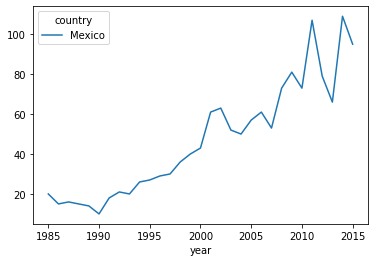

Cluster 4 number of entries 1


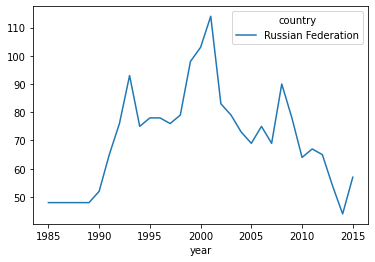

Cluster 10 number of entries 1


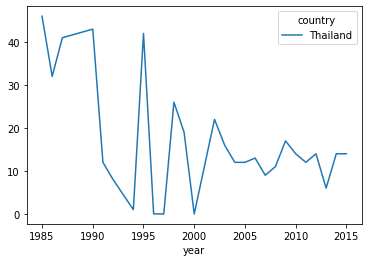

Cluster 5 number of entries 1


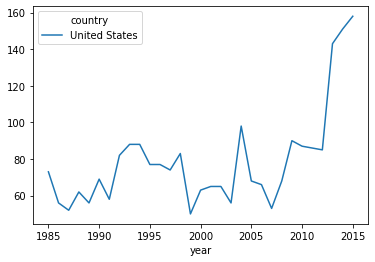

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

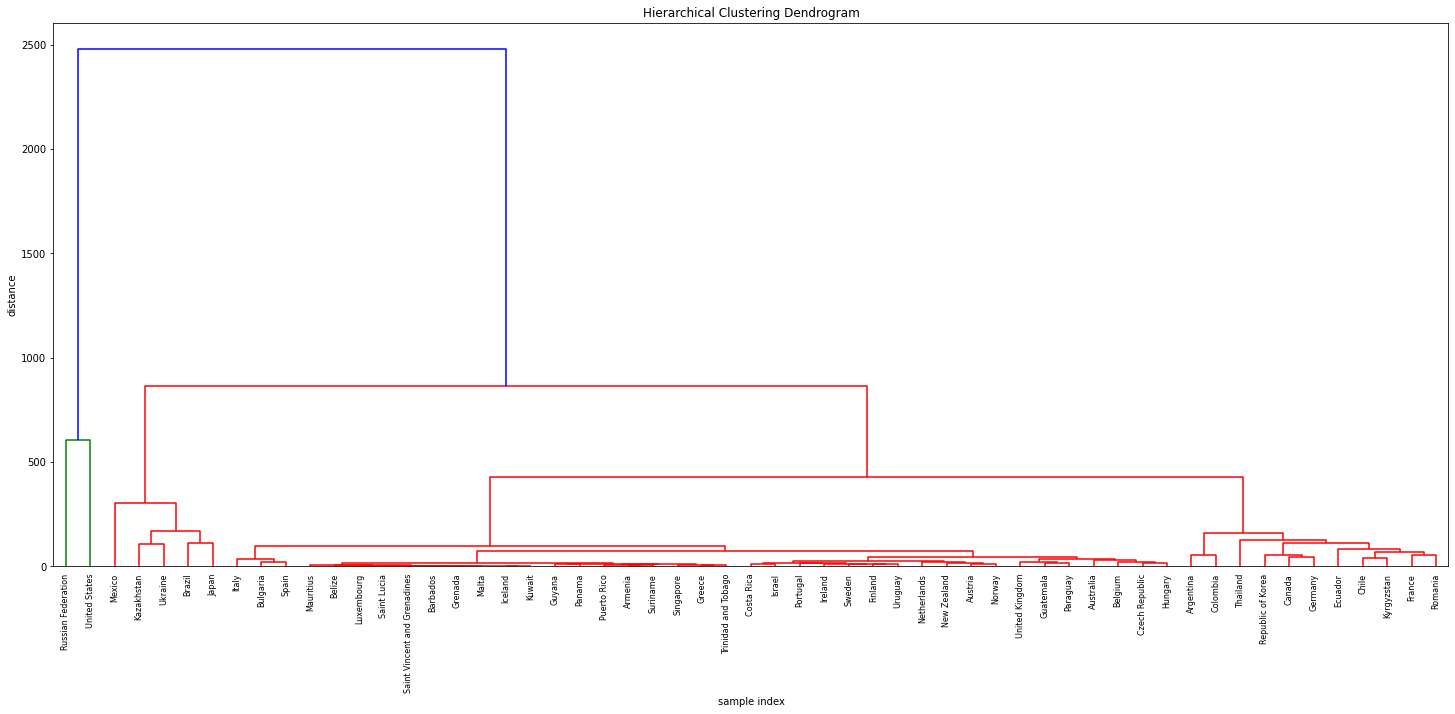

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

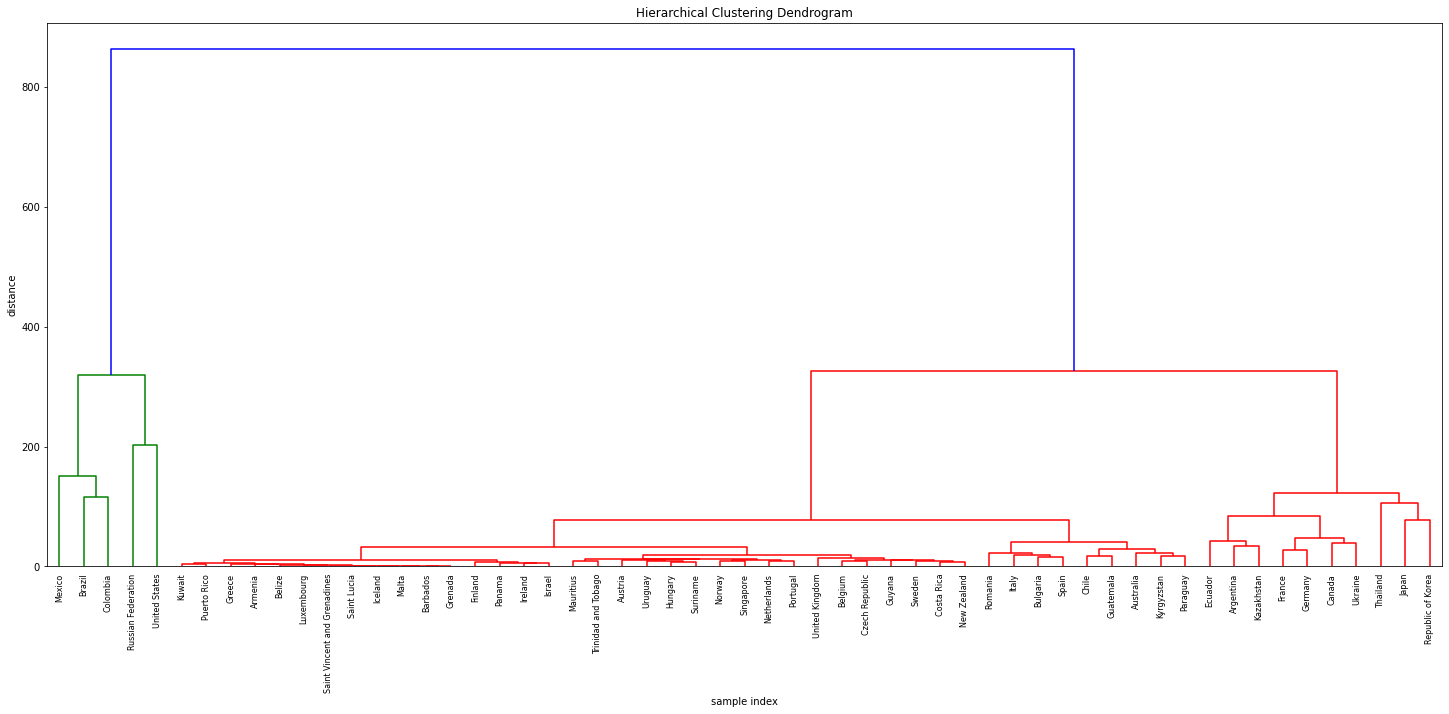

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


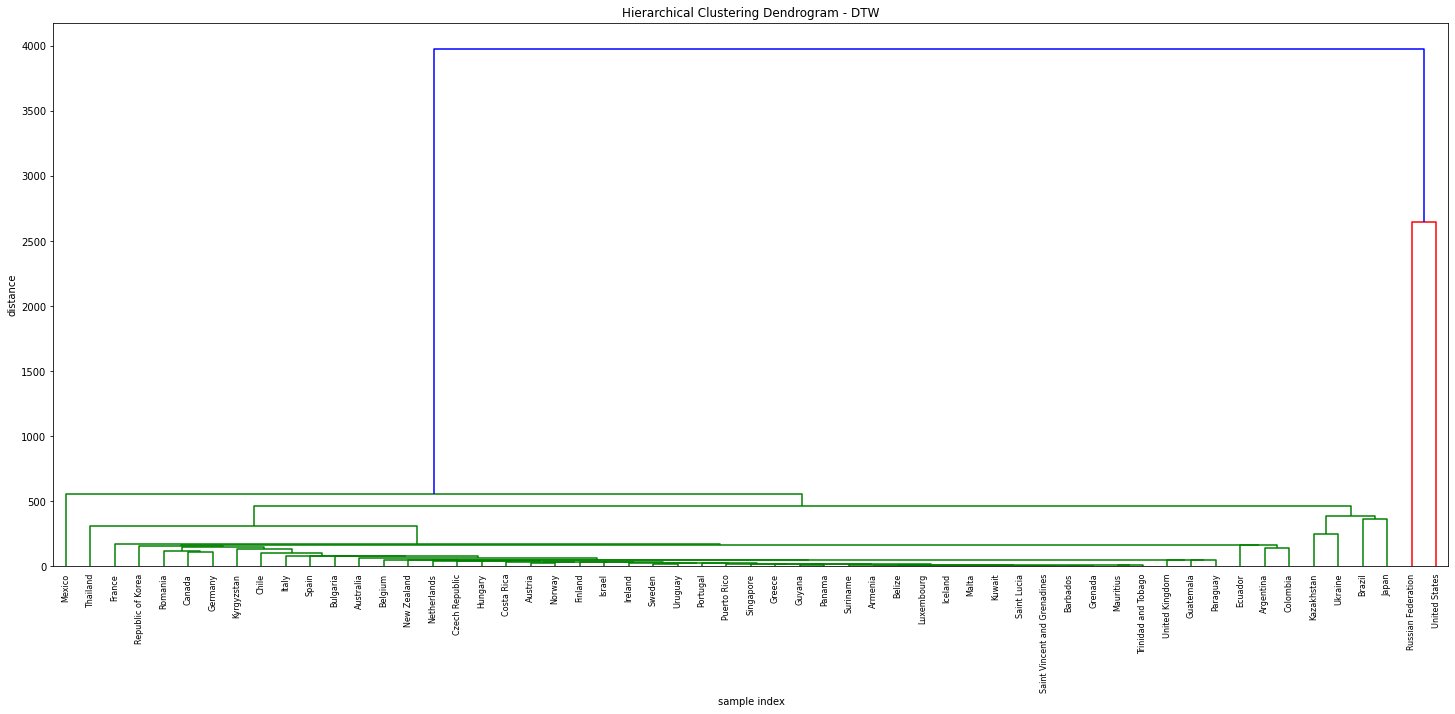

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

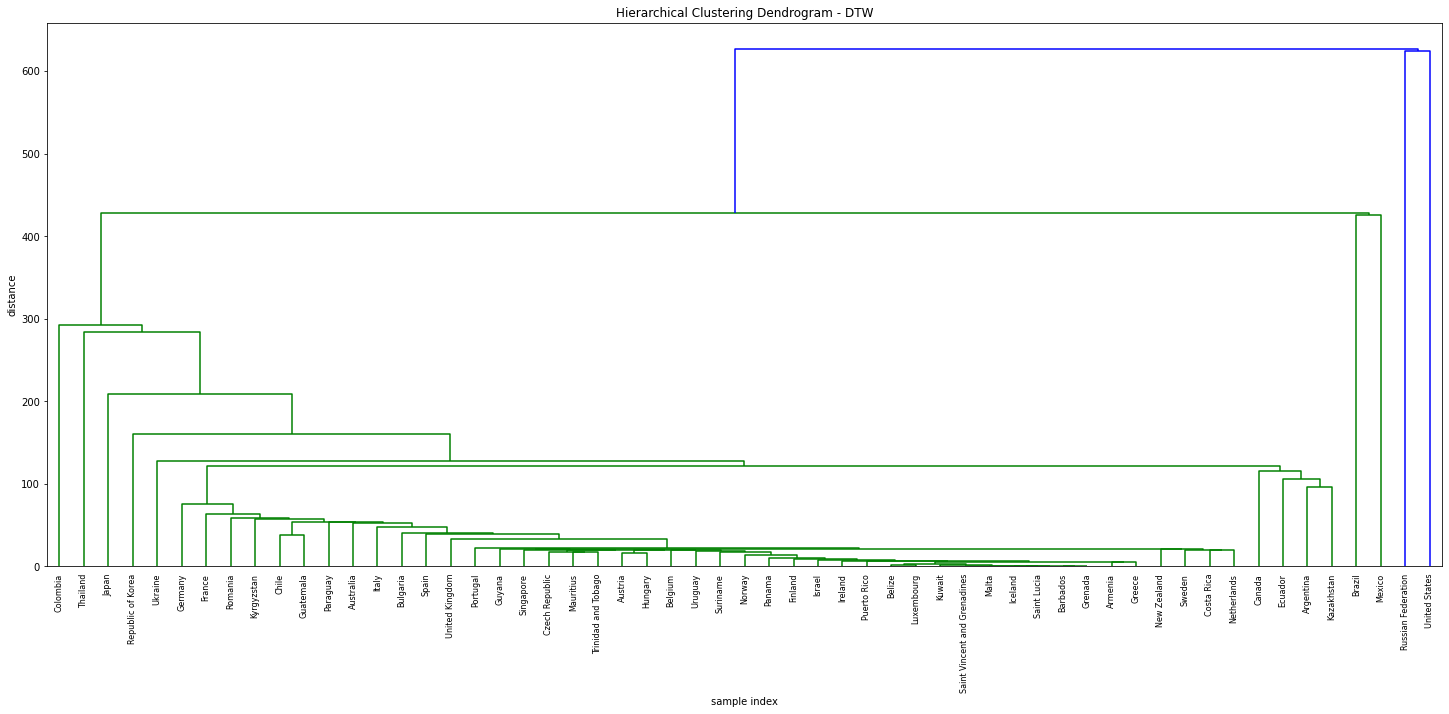

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-DTW:


[ 1  1  1  1  1  1  1  6  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
  1  1  1  7  4  1  1  1  1  1  8  1  1  1  1  1  1  1  1  1  9  1  1  1
  1  1  1  3  1  5  1 10  1]
Cluster 1 number of entries 48


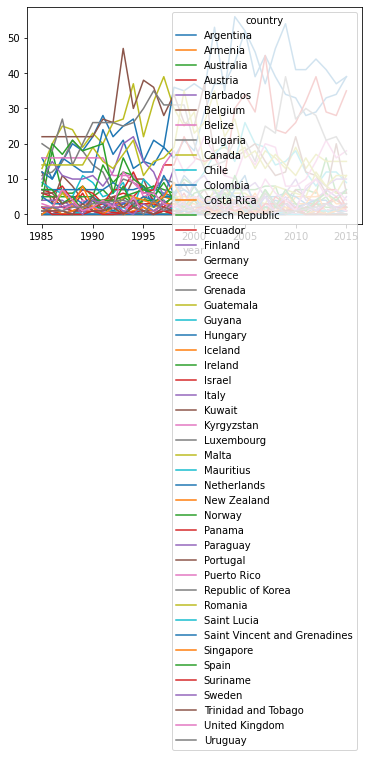

Cluster 6 number of entries 1


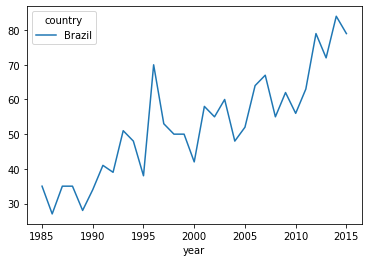

Cluster 2 number of entries 1


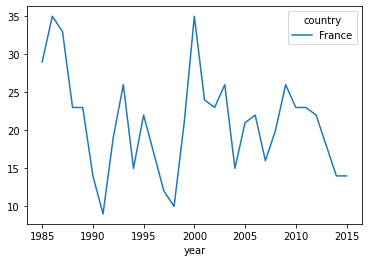

Cluster 7 number of entries 1


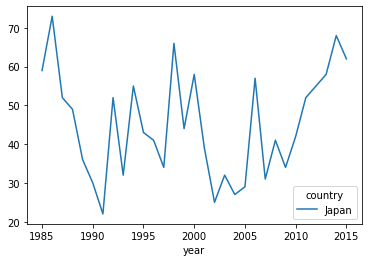

Cluster 4 number of entries 1


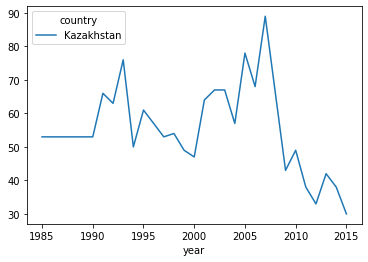

Cluster 8 number of entries 1


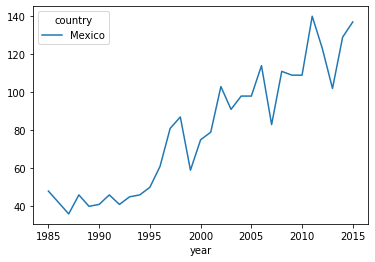

Cluster 9 number of entries 1


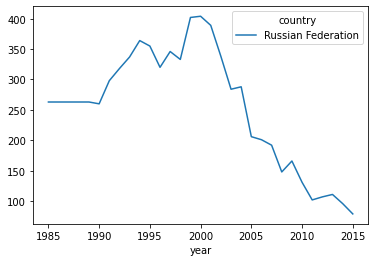

Cluster 3 number of entries 1


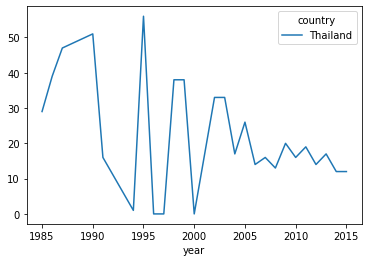

Cluster 5 number of entries 1


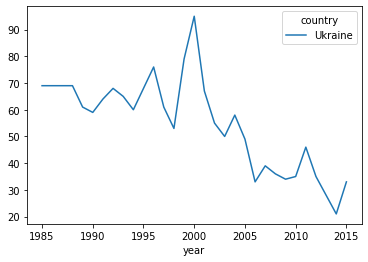

Cluster 10 number of entries 1


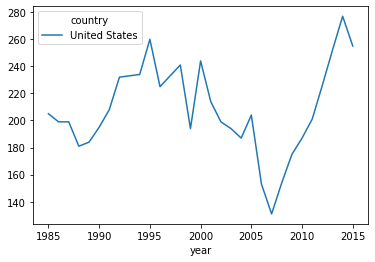

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 1  1  1  1  1  1  1  7  1  1  1  6  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  4  1  1  1  1  1  1  8  1  1  1  1  1  1  1  3  1  9  1  1  1
  1  1  1  5  1  2  1 10  1]
Cluster 1 number of entries 48


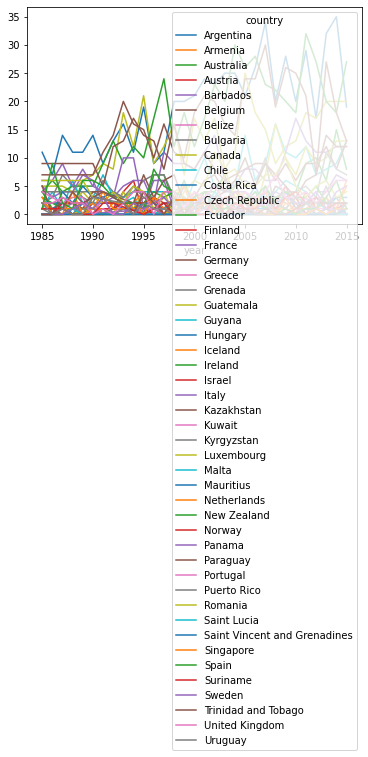

Cluster 7 number of entries 1


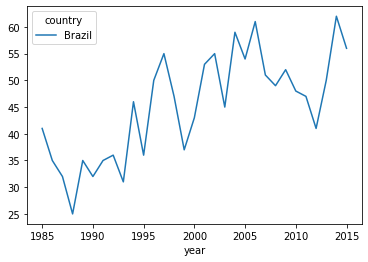

Cluster 6 number of entries 1


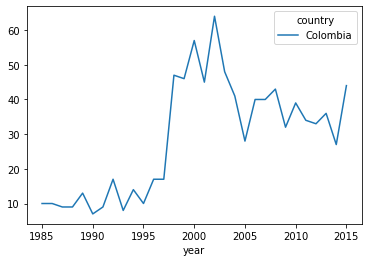

Cluster 4 number of entries 1


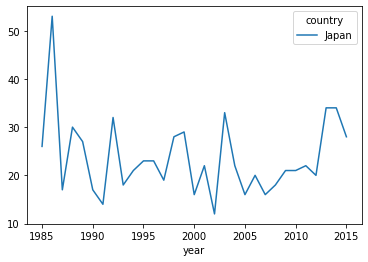

Cluster 8 number of entries 1


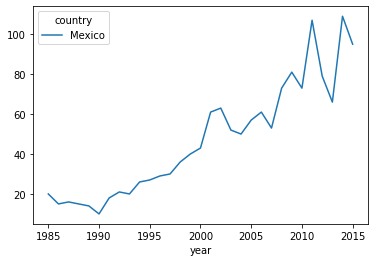

Cluster 3 number of entries 1


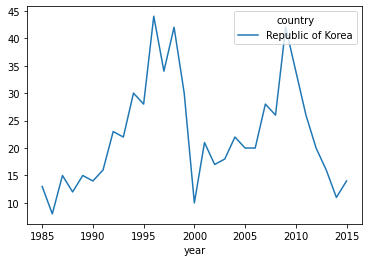

Cluster 9 number of entries 1


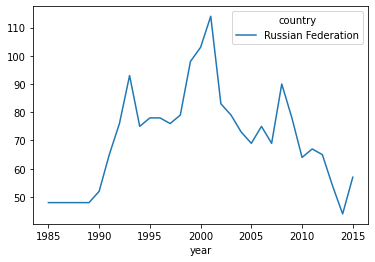

Cluster 5 number of entries 1


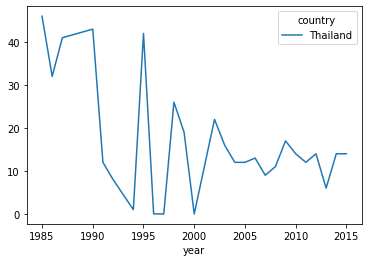

Cluster 2 number of entries 1


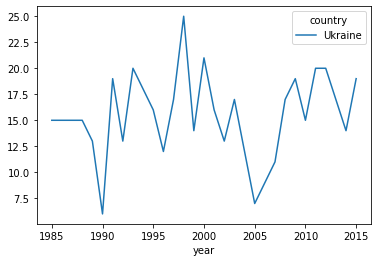

Cluster 10 number of entries 1


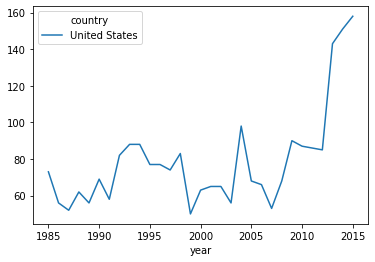

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)